In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Load data, build & compile model, and train

In [2]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=1)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
768/768 [==============================] - 0s 305us/step - loss: 1.6304 - accuracy: 0.5482
Epoch 2/150
768/768 [==============================] - 0s 132us/step - loss: 1.1917 - accuracy: 0.5352
Epoch 3/150
768/768 [==============================] - 0s 125us/step - loss: 0.9671 - accuracy: 0.5885
Epoch 4/150
768/768 [==============================] - 0s 130us/step - loss: 0.8615 - accuracy: 0.5833
Epoch 5/150
768/768 [==============================] - 0s 126us/step - loss: 0.8025 - accuracy: 0.6029
Epoch 6/150
768/768 [==============================] - 0s 113us/step - loss: 0.7523 - accuracy: 0.6302
Epoch 7/150
768/768 [==============================] - 0s 118us/step - loss: 0.7447 - accuracy: 0.6042
Epoch 8/150
768/768 [==============================] - 0s 110us/step - loss: 0.6802 - accuracy: 0.6497
Epoch 9/150
768/768 [==============================] - 0s 112us/step - loss: 0.6720 - accuracy: 0.6628
Epoch 10/150
768/768 [==============================] - 0s 104us/step - l

### Predict

In [3]:
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


In [4]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


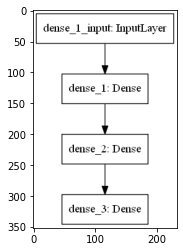

In [6]:
from keras.utils import plot_model
import matplotlib
import matplotlib.pyplot as plt

plot_model(model, to_file='model.png')
data = plt.imread('model.png')
plt.imshow(data)
plt.show()